In [1]:
import sys
sys.path.append("..")
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import json
import functools
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
font = {'family' : 'STIXGeneral',
        'size'   : 15}
matplotlib.rc('font', **font)
from sklearn.metrics import r2_score

from occrx.occParams import OCCSystemParams, OCCTestParams, OCCTxParams, OCCRxParams, OCCChannelParams
from occscripts.occscriptutils import Circle, Rectangle
from occscripts.testdetection import DetectionResults
from occscripts.testcalibration import CalibrationResults
from occscripts.testdecoding import DataResults

def transformCirclePoints(circle, radius):
    return Circle((radius,radius),circle.radius)
def translatePoints(oldCirclePoint,newCirclePoint,points):
    dx,dy = oldCirclePoint - newCirclePoint
    return (points[0]-dx, points[1]-dy)
def drawCircleMatrix(width,height,circle):
    xx, yy = np.mgrid[:height, :width]
    circleMatrix = (xx - circle.centroid[1]) ** 2 + (yy - circle.centroid[0]) ** 2
    return np.repeat(np.expand_dims(((np.logical_and(circleMatrix < circle.radius ** 2, circleMatrix > 0)).astype(np.int))*255,axis=2),3,axis=2)

tests = {
    "detection":"detectiontests",
    "calibration":"calibration",
    "decoding":"decoding"
}
def getTestFolder(baseFolder,frequency,distance,calibration,threshold,isTestTrue, testNumber):
    return baseFolder+'f{}_s1920.0x1080.0_fps30.0_g75.0_wb6500_exp3.0_distance{}cm'.format(frequency,distance)\
                        +'/calibration/cal{}_th{}/{}{}/'.format(calibration,threshold,isTestTrue,testNumber)

def getParamsForTest(testFolder):
    
    occSystemParams = OCCSystemParams()
    occTestParams = OCCTestParams()
    occDetetionCircle = Circle()
    occDetectionResults = DetectionResults()
    occCalibrationResults = CalibrationResults()
    occDataResults = DataResults()
    
    try:
        with open(testFolder+"/occsystemparams.json") as json_file:
            occSystemParams.initFromJSON(json.load(json_file))
    except IOError:
        occSystemParams = None
    try:
        with open(testFolder+"/occtestparams.json") as json_file:
            occTestParams.initFromJSON(json.load(json_file))
    except IOError:
        occTestParams = None
    try:
        with open(testFolder+"/circle.json") as json_file:
            occDetetionCircle.initFromJSON(json.load(json_file))
    except IOError:
        occTestParams = None
    try:
        with open(testFolder+"/detectionresults.json") as json_file:
            occDetectionResults.initFromJSON(json.load(json_file))
    except IOError:
        occDetectionResults = None
    try:
        with open(testFolder+"/calibrationresults.json") as json_file:
            occCalibrationResults.initFromJSON(json.load(json_file))
    except IOError:
        occCalibrationResults = None
    try:
        with open(testFolder+"/dataresults.json") as json_file:
            occDataResults.initFromJSON(json.load(json_file))
    except IOError:
        occDataResults = None
    
    return occSystemParams,occTestParams,occDetetionCircle,occDetectionResults,occCalibrationResults,occDataResults

def combine(res,future):
    if(len(res)==0):
        res=[]
        res.append(future)
    elif not res[len(res)-1]==future:
        res.append(future)
    return res

# records = functools.reduce(hello, futures, [])
# print(records)

In [21]:
baseFolder = '../testbed/part2/'
frequency = 2160
distance = 45
cal = 5
th = 0.834
isTestTrue = 'true'
testNumber = 0

testFolder = getTestFolder(baseFolder,frequency,distance,cal,th,isTestTrue, testNumber)
print(testFolder)

occSystemParams,\
occTestParams,\
occDetetionCircle,\
occDetectionResults,\
occCalibrationResults,\
occDataResults = getParamsForTest(testFolder)

with open ('../testbed/randombits.txt', 'r') as file:
    randomBits = list(map(int,file.read().split(',')))

../testbed/part2/f2160_s1920.0x1080.0_fps30.0_g75.0_wb6500_exp3.0_distance45cm/calibration/cal5_th0.834/true0/


In [22]:
testResults = functools.reduce(combine, occDataResults._binaryData, [])
originalData = functools.reduce(combine, randomBits, [])
print(len(testResults))
print(len(originalData))

9994
9989


In [25]:
testResults[0]

803

In [9]:
originalData[0]

803

In [24]:
del(testResults[0])

In [26]:
testR = np.array(testResults)
origD = np.array(originalData)

while(len(testR)<len(origD)):
    testR = np.append(testR, 0)
while(len(origD)<len(testR)):
    origD = np.append(origD, 0)
    
print(len(testR))
print(len(origD))

9993
9993


[ True  True  True ... False False  True]


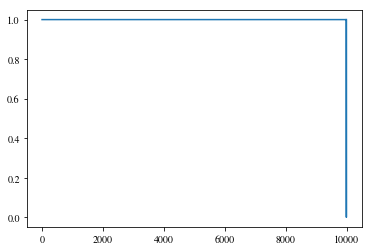

In [30]:
equals = np.equal(testR,origD)
plt.plot(equals)
print(equals)

In [31]:
index = np.argmax(equals==False)
print(testR[index-1:index+2])
print(origD[index-1:index+2])

[829 129  18]
[829   0   0]


In [29]:
testR = np.delete(testR,index)
while(len(testR)<len(origD)):
    testR = np.append(testR, 0)